In [1]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max
from natsort import natsorted

%matplotlib inline

In [3]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2023-09-21-aunr-kinetics','')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')



In [4]:
'''
Import example data from UV-Vis-NIR folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
df_27 = pd.read_csv(DATA_UV_DIR_PATH+'AR-2023-09-21-AUNR-KINET-27.csv', skiprows=1)

df_abs_27 = df_27.iloc[:, 1::2]
df_wav_27 = df_27.iloc[:, 0::2]

# find the peak position and value between 650 to 1100 nm
peaks_27 = df_abs_27.loc[200:350,:].max() # 900 to 750 nm

# Find the indices of maximum values within the specified range
peak_indices_27 = df_abs_27.loc[200:350, :].idxmax() # 900 to 750 nm

# Get the corresponding values from column 1
corresponding_values_27 = df_27.loc[peak_indices_27, 'Wavelength (nm)']  # Use '1' as a string, assuming the column label is '1'

wav_abs400_27 = df_27.loc[700,:] # 400 nm
abs400_27 = wav_abs400_27[1::2]

df_27.loc[200:350, :]
peaks_27
corresponding_values_27_edit = corresponding_values_27[3:]

wav_abs520_27 = df_27.loc[580,:] # 520 nm
abs520_27 = wav_abs520_27[1::2]

In [5]:
abs_ratio_27 = peaks_27/abs400_27
abs_ratio_27

abs_rat_520_27 = peaks_27/abs520_27
abs_rat_520_27

Abs       -12.157383
Abs.1       5.474329
Abs.2       2.910852
Abs.3       2.314693
Abs.4       2.576344
             ...    
Abs.116     4.059407
Abs.117     4.055729
Abs.118     4.051919
Abs.119     4.040760
Abs.120     4.048900
Length: 121, dtype: float64

In [7]:
'''
Import example data from UV-Vis-NIR folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
df_36 = pd.read_csv(DATA_UV_DIR_PATH+'AR-Aunr-syn-kin-36C.csv', skiprows=1)

df_abs_36 = df_36.iloc[:, 1::2]
df_wav_36 = df_36.iloc[:, 0::2]

# find the peak position and value between 650 to 1100 nm
peaks_36 = df_abs_36.loc[200:350,:].max()

# Find the indices of maximum values within the specified range
peak_indices_36 = df_abs_36.loc[200:350, :].idxmax()

# Get the corresponding values from column 1
corresponding_values_36 = df_36.loc[peak_indices_36, 'Wavelength (nm)']  # Use '1' as a string, assuming the column label is '1'

wav_abs400_36 = df_36.loc[700,:]
abs400_36 = wav_abs400_36[1::2]

peaks_36
corresponding_values_36_edited = corresponding_values_36[1:]

wav_abs520_36 = df_36.loc[580,:] # 520 nm
abs520_36 = wav_abs520_36[1::2]

In [8]:
abs_ratio_36 = peaks_36/abs400_36

abs_rat_520_36 = peaks_36/abs520_36

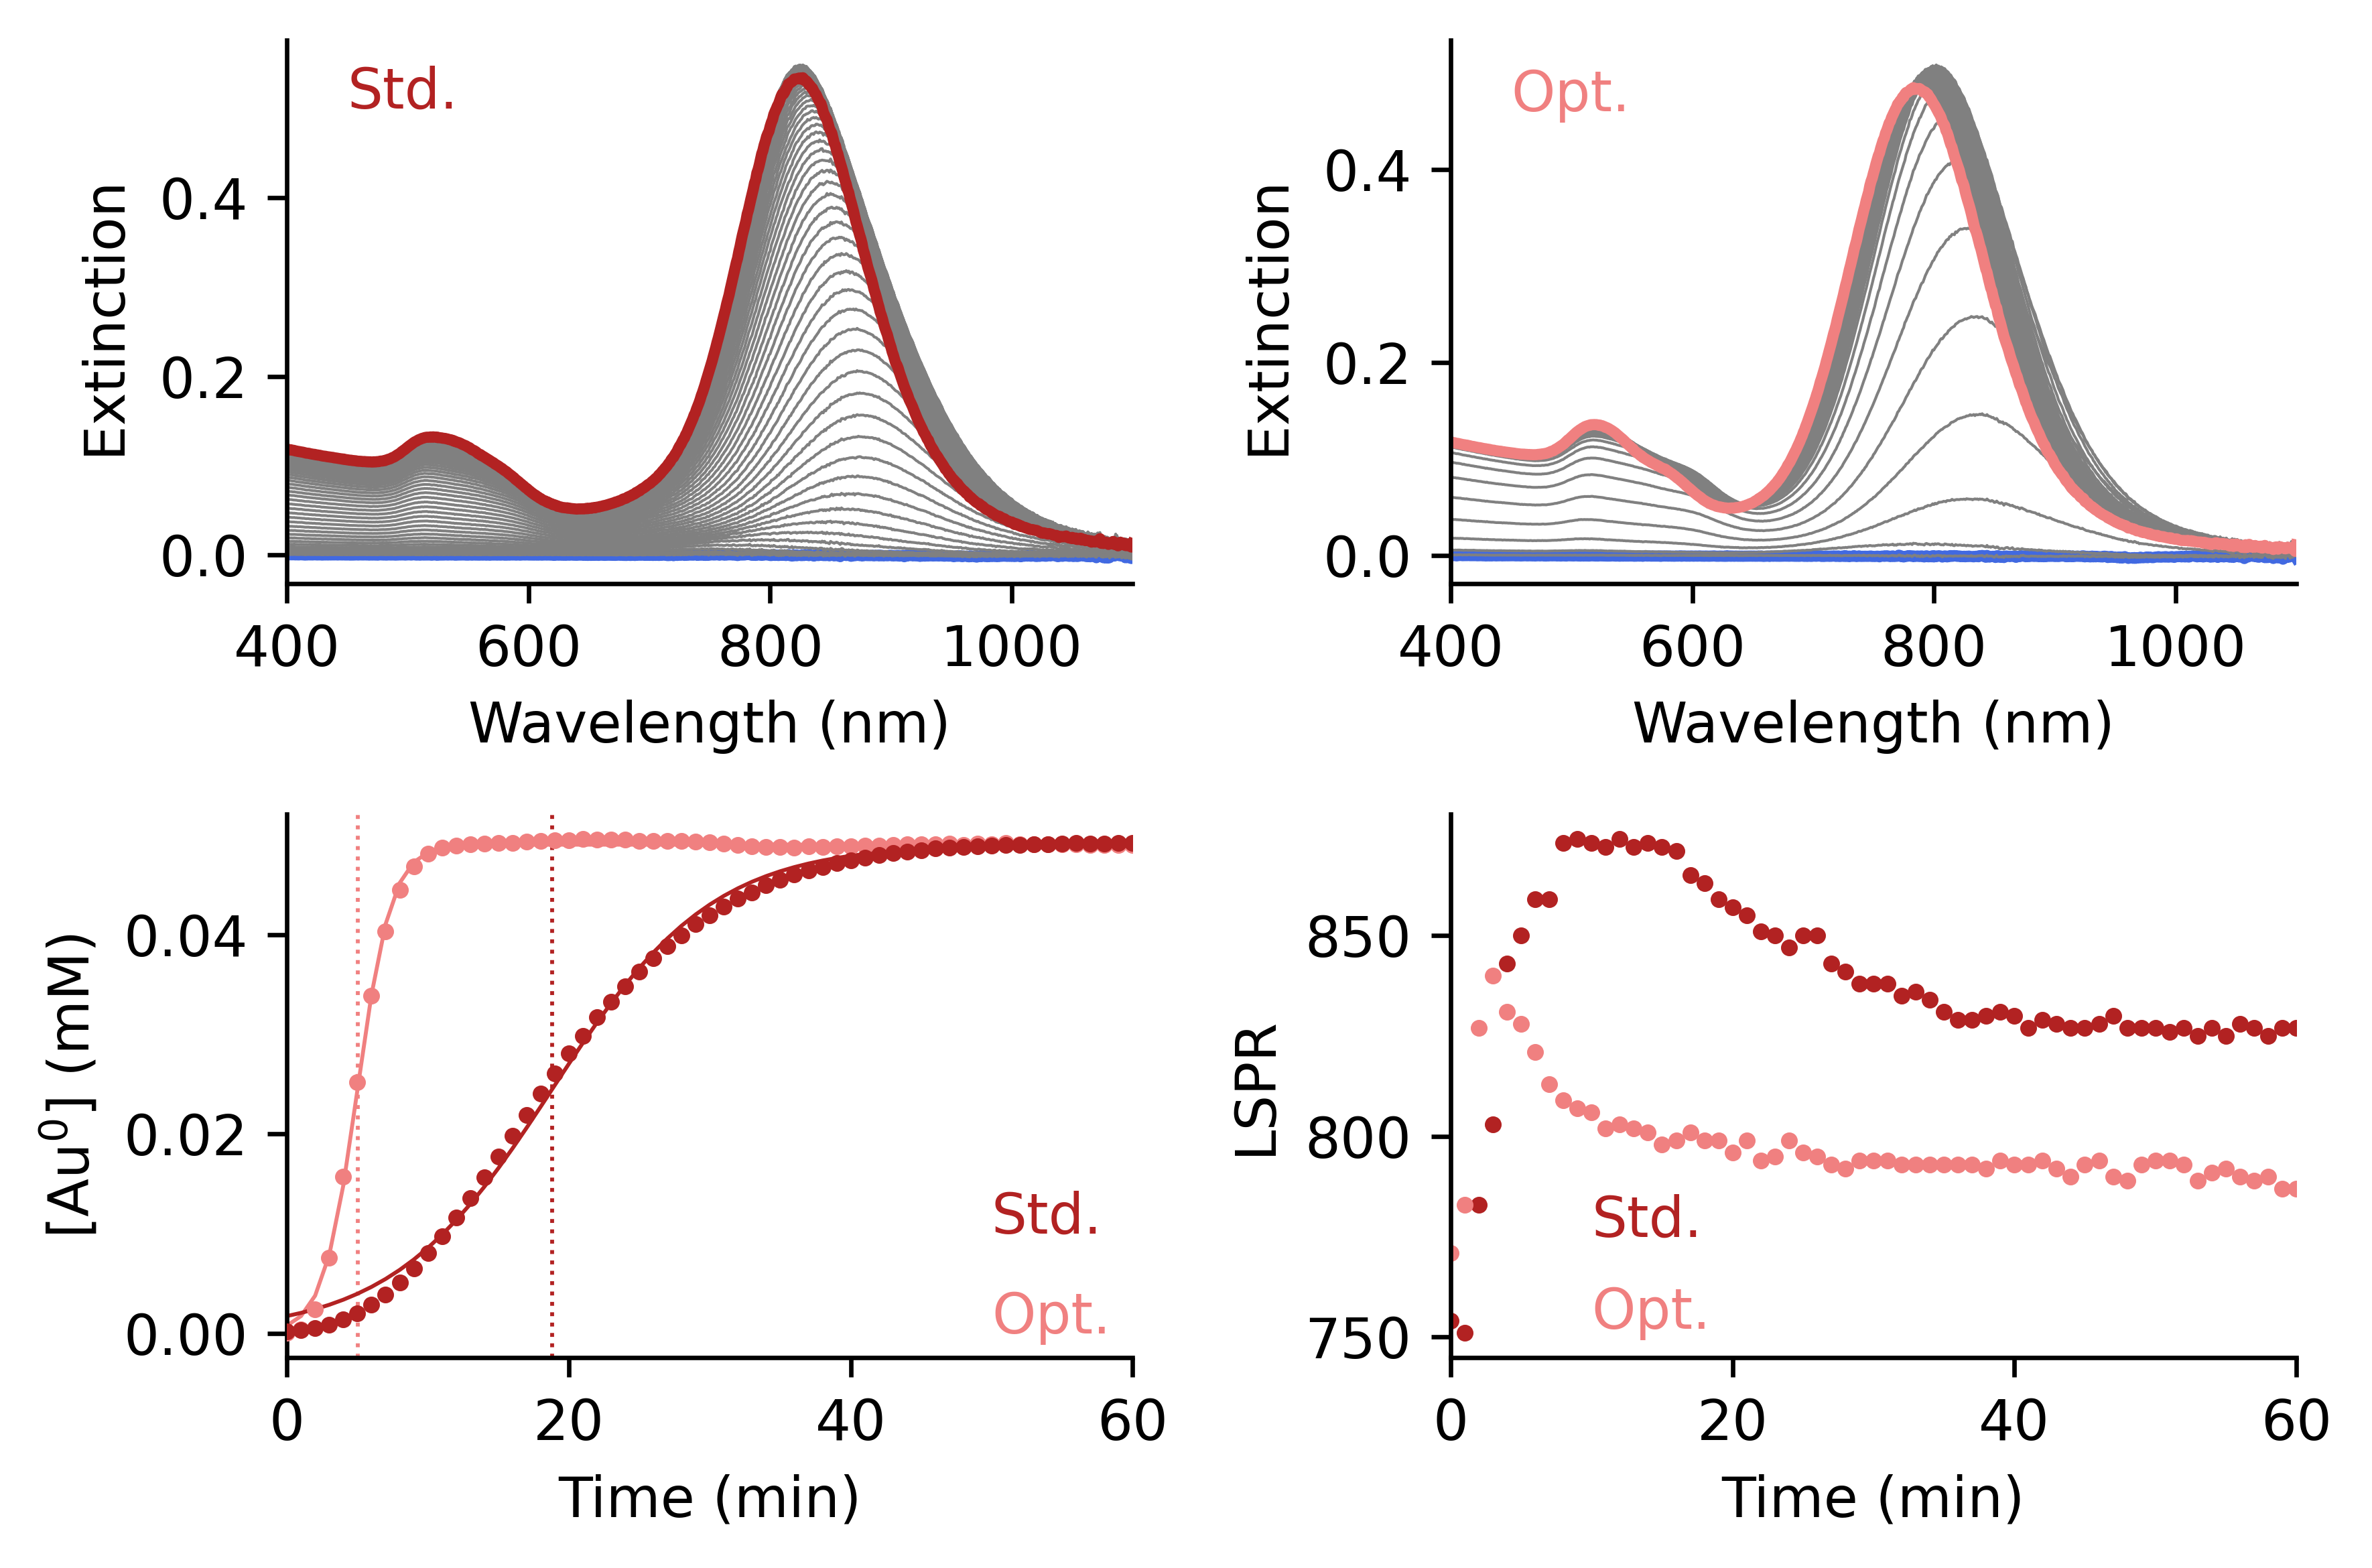

The parameters for the sigmoidal plot 27 is:  [ 0.04906176  0.17569675 18.83747632]
The parameters for the sigmoidal plot 36 is:  [0.04901985 0.82484112 5.01115248]
The inflexion point for 27C is around  3.76 times than 36C
The rate of Au reduction at 36C is around  4.69 times than 27C


In [21]:
#================ plot data ===========================#

fig = plt.figure(figsize=(6,4), dpi=600)
gs = fig.add_gridspec(2, 2) #nrows, #ncolumns
ax1 = fig.add_subplot(gs[0, 0]) # upper left subplot
ax2 = fig.add_subplot(gs[0, 1]) # upper rigth subplot
ax3 = fig.add_subplot(gs[1, 0]) # lower left subplot
ax4 = fig.add_subplot(gs[1, 1]) # lower right subplot

#=============First plot======================#

for i in np.arange(len(df_abs_27.columns)):
    if i == 0:
        color = 'royalblue'
        linewidth = 2
    elif i == len(df_abs_27.columns)-1:
        color = 'firebrick'
        linewidth = 2
    else:
        color = 'grey'
        linewidth = 0.5
    ax1.plot(df_27['Wavelength (nm)'], df_abs_27.iloc[:,i], color= color, linewidth = linewidth)         

ax1.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,1.1])                       # set absorbance limit
ax1.set_xlabel(r'Wavelength (nm)')          # set axis label
ax1.set_ylabel(r'Extinction ')              # set axis label
ax1.spines['right'].set_visible(False)      # remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)      # remove spines
ax1.spines['top'].set_visible(False)
ax1.annotate('Std.', xy = (450,0.5), color = 'firebrick')

#=============Second plot======================#

for i in np.arange(len(df_abs_36.columns)):
    if i == 0:
        color = 'royalblue'
        linewidth = 2
    elif i == len(df_abs_36.columns)-1:
        color = 'lightcoral'
        linewidth = 2
    else:
        color = 'grey'
        linewidth = 0.5
    ax2.plot(df_36['Wavelength (nm)'], df_abs_36.iloc[:,i], color = color, linewidth = linewidth)   

ax2.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,1.1])                       # set absorbance limit
ax2.set_xlabel(r'Wavelength (nm)')          # set axis label
ax2.set_ylabel(r'Extinction ')              # set axis label
ax2.spines['right'].set_visible(False)      # remove spines
ax2.spines['top'].set_visible(False)
ax2.annotate('Opt.', xy = (450,0.46), color = 'lightcoral')


#=============Third plot======================#

ax3.scatter(np.arange(0,len(corresponding_values_27), 1),abs400_27*0.416, label = 'Std.', s=4, color = 'firebrick', zorder = 4)                           # plot data
ax3.scatter(np.arange(0,len(corresponding_values_27), 1),abs400_36*0.416, label = 'Opt.', s=4, color = 'lightcoral', zorder = 3)                           # plot data
ax3.axvline(x=18.83747668, color = 'firebrick', linewidth = 0.7, linestyle = 'dotted')
ax3.axvline(x=5.01115249, color = 'lightcoral', linewidth = 0.7, linestyle = 'dotted')
ax3.set_xlim([0,60])                    # set wavelength limit
#ax.set_ylim([0,1.1])                       # set absorbance limit
ax3.set_xlabel(r'Time (min)')          # set axis label
ax3.set_ylabel(r'[Au$^0$] (mM)')              # set axis label
#ax3.legend(frameon=False)
ax3.spines['right'].set_visible(False)      # remove spines
ax3.spines['top'].set_visible(False)
ax3.annotate('Std.', xy = (50,0.01), color = 'firebrick')
ax3.annotate('Opt.', xy = (50,0.00), color = 'lightcoral')

# ====================Fitting the sigmoidal curves =========================#

# Define the sigmoidal function
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

xdata_27 = np.arange(0,len(corresponding_values_27), 1)
ydata_27 = abs400_27*0.416

# Fit the sigmoidal function to the data
initial_guess = [1, 1, 1]  # Initial guess for the parameters (a, b, c)
params, covariance = curve_fit(sigmoid, xdata_27, ydata_27, p0=initial_guess) 

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate the fitted curve
y_fit_27 = sigmoid(xdata_27, a_fit, b_fit, c_fit)

ax3.plot(xdata_27, y_fit_27, label='Fit', color='firebrick', linewidth = 0.7, zorder = 2)

#==================================================#

xdata_36 = np.arange(0,len(corresponding_values_36), 1)
ydata_36 = abs400_36*0.416

# Fit the sigmoidal function to the data
initial_guess = [1, 1, 1]  # Initial guess for the parameters (a, b, c)
params_36, covariance_36 = curve_fit(sigmoid, xdata_36, ydata_36, p0=initial_guess) 

# Extract the fitted parameters
a_fit_36, b_fit_36, c_fit_36 = params_36

# Generate the fitted curve
y_fit_36 = sigmoid(xdata_36, a_fit_36, b_fit_36, c_fit_36)

ax3.plot(xdata_36, y_fit_36, label='Fit', color='lightcoral', linewidth = 0.7, zorder = 1)

#=============Fourth plot======================#

ax4.scatter(np.arange(0,len(corresponding_values_27_edit), 1),corresponding_values_27_edit, label = 'Std.', s=4, color = 'firebrick')          # plot data
ax4.scatter(np.arange(0,len(corresponding_values_36_edited), 1),corresponding_values_36_edited, label = 'Opt.', s=4, color = 'lightcoral')        # plot data
ax4.set_xlim([0,60])                    # set wavelength limit
#ax4.set_ylim([0,1.1])                       # set absorbance limit
ax4.set_xlabel(r'Time (min)')          # set axis label
ax4.set_ylabel(r'LSPR')              # set axis label
#ax4.legend(frameon=False)
ax4.spines['right'].set_visible(False)      # remove spines
ax4.spines['top'].set_visible(False)
ax4.annotate('Std.', xy = (10,775), color = 'firebrick')
ax4.annotate('Opt.', xy = (10,752), color = 'lightcoral')

plt.tight_layout()
plt.show()

print('The parameters for the sigmoidal plot 27 is: ', params)
print('The parameters for the sigmoidal plot 36 is: ', params_36)
print('The inflexion point for 27C is around ', round(c_fit/c_fit_36, 2), 'times than 36C')
print('The rate of Au reduction at 36C is around ', round(b_fit_36/b_fit, 2), 'times than 27C')

fig.savefig(RESULT_DIR_PATH + 'Fig_2_b_c_d_e.png',  bbox_inches ='tight', transparent = True)

In [11]:
# Create dataframes (replace these with your actual data)
# Example data with 701 rows and 121 columns
x_27 = df_wav_27 
y_27 = df_abs_27

def calculate_fwhm(wavelengths, intensities):
    max_intensity = np.max(intensities)
    max_intensity_index = np.argmax(intensities)
    half_max_intensity = max_intensity / 2
    left_index = np.where(intensities[:max_intensity_index] <= half_max_intensity)[0][-1]
    right_index = np.where(intensities[max_intensity_index:] <= half_max_intensity)[0][0] + max_intensity_index
    left_wavelength = np.interp(half_max_intensity, intensities[left_index:left_index + 2], wavelengths[left_index:left_index + 2])
    right_wavelength = np.interp(half_max_intensity, intensities[right_index - 1:right_index + 1], wavelengths[right_index - 1:right_index + 1])
    fwhm = right_wavelength - left_wavelength
    return abs(fwhm)

fwhm_values_27 = []

# Loop through columns (spectra) and calculate FWHM for each
for column in range(x_27.shape[1]):
    wavelengths = x_27.iloc[:, column].values
    intensities = y_27.iloc[:, column].values
    fwhm_27 = calculate_fwhm(wavelengths, intensities)
    fwhm_values_27.append(fwhm_27)

# Create a new dataframe with FWHM values
fwhm_df_27 = pd.DataFrame({'Spectrum': range(1, x_27.shape[1] + 1), 'FWHM': fwhm_values_27})

In [12]:
# Create dataframes (replace these with your actual data)
# Example data with 701 rows and 121 columns
x_36 = df_wav_36 
y_36 = df_abs_36

def calculate_fwhm(wavelengths, intensities):
    max_intensity = np.max(intensities)
    max_intensity_index = np.argmax(intensities)
    half_max_intensity = max_intensity / 2
    left_index = np.where(intensities[:max_intensity_index] <= half_max_intensity)[0][-1]
    right_index = np.where(intensities[max_intensity_index:] <= half_max_intensity)[0][0] + max_intensity_index
    left_wavelength = np.interp(half_max_intensity, intensities[left_index:left_index + 2], wavelengths[left_index:left_index + 2])
    right_wavelength = np.interp(half_max_intensity, intensities[right_index - 1:right_index + 1], wavelengths[right_index - 1:right_index + 1])
    fwhm = right_wavelength - left_wavelength
    return abs(fwhm)

fwhm_values_36 = []

# Loop through columns (spectra) and calculate FWHM for each
for column in range(x_36.shape[1]):
    wavelengths = x_36.iloc[:, column].values
    intensities = y_36.iloc[:, column].values
    fwhm_36 = calculate_fwhm(wavelengths, intensities)
    fwhm_values_36.append(fwhm_36)

# Create a new dataframe with FWHM values
fwhm_df_36 = pd.DataFrame({'Spectrum': range(1, x_36.shape[1] + 1), 'FWHM': fwhm_values_36})

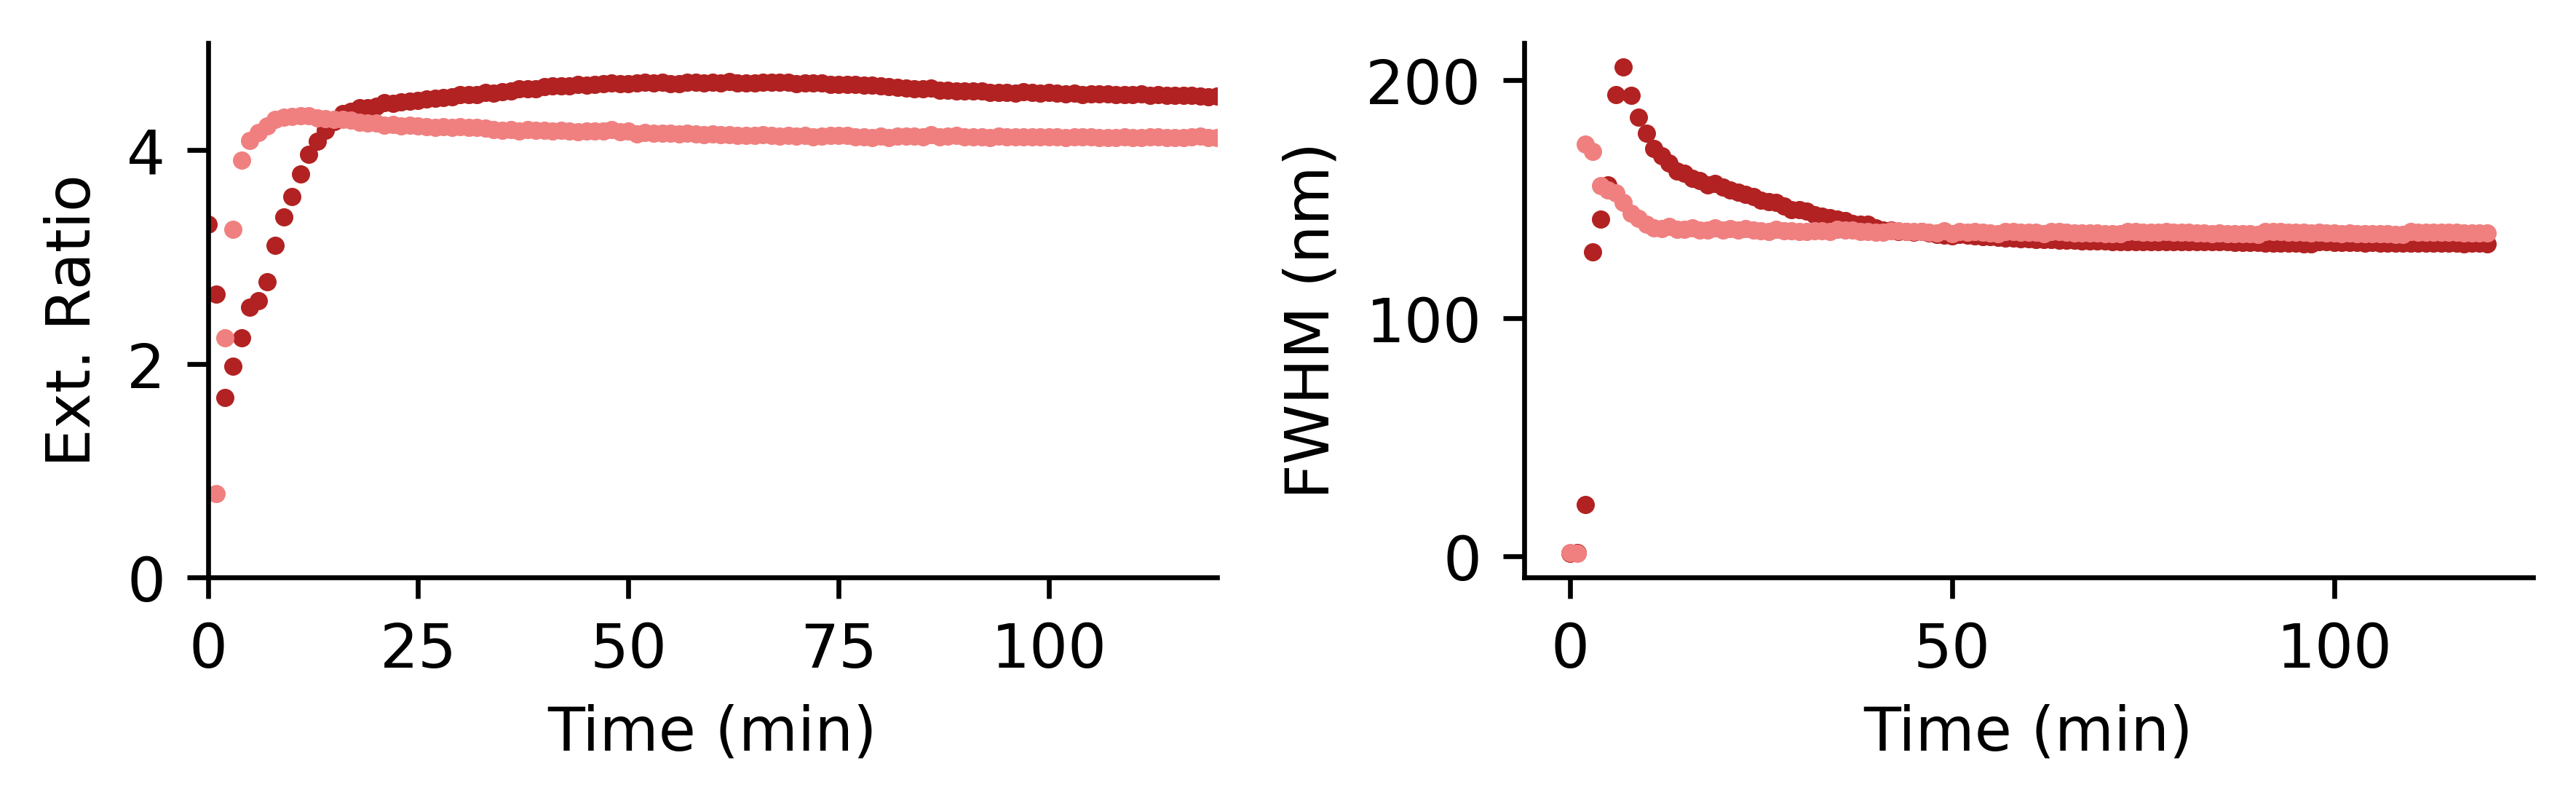

In [14]:
#================ plot data ===========================#

fig = plt.figure(figsize=(6,2), dpi=600)
gs = fig.add_gridspec(1, 2) #nrows, #ncolumns
ax1 = fig.add_subplot(gs[0, 0]) # upper left subplot
ax2 = fig.add_subplot(gs[0, 1]) # upper rigth subplot

#=============First plot======================#

ax1.scatter(np.arange(0,len(abs_ratio_27), 1),abs_ratio_27, label = 'El-Sayed', s=4, color = 'firebrick')          # plot data
ax1.scatter(np.arange(0,len(abs_ratio_36), 1),abs_ratio_36, label = 'Optimized', s=4, color = 'lightcoral')        # plot data         

ax1.set_xlim([0,120])                    # set wavelength limit
ax1.set_ylim([0,5])                       # set absorbance limit
ax1.set_xlabel(r'Time (min)')          # set axis label
ax1.set_ylabel(r'Ext. Ratio ')              # set axis label
ax1.spines['right'].set_visible(False)      # remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)      # remove spines
ax1.spines['top'].set_visible(False)
ax1.annotate('Std.', xy = (450,0.5), color = 'firebrick')

#=============Second plot======================#

ax2.scatter(np.arange(0,len(fwhm_values_27), 1),fwhm_values_27, label = 'El-Sayed', s=4, color = 'firebrick')          # plot data
ax2.scatter(np.arange(0,len(fwhm_values_36), 1),fwhm_values_36, label = 'Optimized', s=4, color = 'lightcoral')        # plot data         

#ax2.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,1.1])                       # set absorbance limit
ax2.set_xlabel(r'Time (min)')          # set axis label
ax2.set_ylabel(r'FWHM (nm) ')              # set axis label
ax2.spines['right'].set_visible(False)      # remove spines
ax2.spines['top'].set_visible(False)
ax2.annotate('Opt.', xy = (450,0.46), color = 'lightcoral')

plt.tight_layout()
plt.show()

fig.savefig(RESULT_DIR_PATH + 'Fig_2f_g.png',  bbox_inches ='tight', transparent = True)

## Plotting the parallels co-ordinate graph

The format/ order is **volumes** of : Asc. acid, Ag, seeds, HCl, Temp, Loss 

In [16]:
import pandas as pd
import plotly.express as px

std_vol = [100, 120, 24, 60, 27, 6.05]
opt_vol = [435, 117, 40, 203, 36, 6.96]

std = [1, 0.12, 0.0012, 6, 27, 6.05] #conc
opt = [4.35, 0.117, 0.002, 20.3, 36, 6.96] #conc

column = ['Asc-acid', 'silver', 'seeds', 'hcl', 'temp', 'loss']

dataframe = pd.DataFrame(list(zip(std, opt)), columns=['std', 'opt'])

df_nohead = dataframe.transpose()

df_nohead.columns = column  # Set the column names correctly

# If you want to overwrite the original DataFrame 'df_nohead', you don't need 'inplace=True'
df = df_nohead


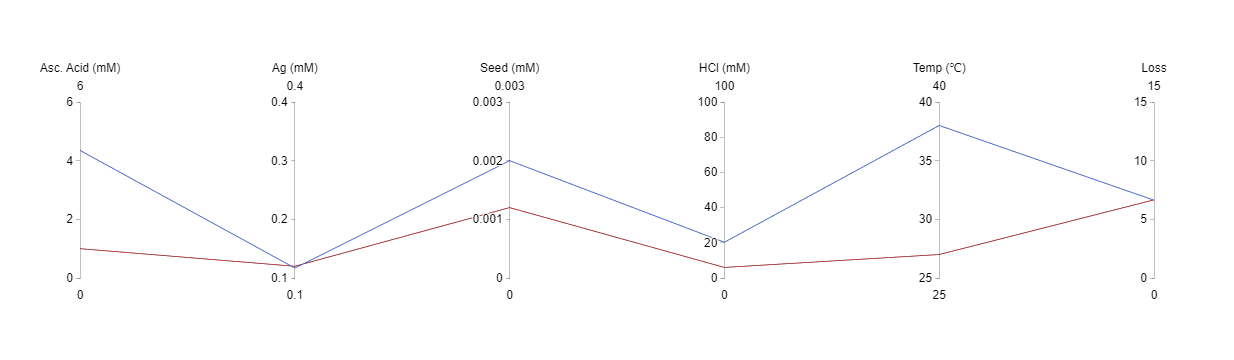

In [18]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from PIL import Image
import io  

fig = go.Figure(data=go.Parcoords(
    line=dict(
        color=df['loss'],
        colorscale=[[0, 'firebrick'], [1, 'royalblue']]
    ),
    dimensions=list([
        dict(range=[0, 6], label='Asc. Acid (mM)', values=[1, 4.35]),
        dict(range=[0.1, 0.4], label='Ag (mM)', values=[0.12, 0.117]),
        dict(range=[0, 0.003], label='Seed (mM)', values=[0.0012, 0.002]),
        dict(range=[0, 100], label='HCl (mM)', values=[6, 20.3]),
        dict(range=[25, 40], label='Temp (℃)', values=[27, 38]),
        dict(range=[0, 15], label='Loss', values=[6.66, 6.63]),
    ]),
))

# Increase the text size
fig.update_layout(
    font=dict(
        size=14,  # Increase the text size
        family='Arial',
        color='black'
    )
)

fig.show()

# Constants factors
marginInches = 1/18
ppi = 96
width_inches = 5.9
height_inches = 3

# Save the plot as an image with specified dimensions and DPI
fig.write_image(os.path.join(RESULT_DIR_PATH, 'Fig_2a.svg'), width=(width_inches - marginInches)*ppi, height=(height_inches  - marginInches)*ppi)


## Calculate the loss of El-Sayed and Optimized AuNRs

In [19]:
# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH_FINAL = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2023-09-21-aunr-kinetics','final-spec', '')

In [20]:
# Path to folder containing CSV files
folder_path = DATA_UV_DIR_PATH_FINAL

# Load reference CSV file
ref_df = pd.read_csv(os.path.join(folder_path, 'rev-obj.csv'))

# Initialize empty list to store norm values
norm_values = []
file_names = []

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename != 'rev-obj.csv':
        # Load CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())     

        # Calculate the L2 norm of the difference between the normalized second column of the file and the reference file
        diff = df.iloc[:, 1] - ref_df.iloc[:, 1]

        norm_value = np.linalg.norm(diff)
        norm_value = round(norm_value, 2)
        
        # Add the norm value to the list
        norm_values.append((filename,norm_value))

# Print the list of all the norm values
print(natsorted(norm_values))


[('27c-2.csv', 6.66), ('36-2.csv', 6.63)]
